# <center>Week 14 Class 1 <center>
<div align="right"> April 18 2023 </div>

<div class="alert alert-block alert-warning">


# Today's aims:

* **_More on 1D ODEs, implicit method_**
* **_Intgration in 2D_**
* examples: temperature, reaction diffusion, electromagnetism.


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from math import *


# Propagation of waves

Reaction diffusion models such as predator pray when coupled in space via diffusion can produce propagating waves and Turing Patterns.


## 1D FitzHugh-Nagumo Model
#### We add the diffusion to the voltage variable
$$
    \frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial t} + u(1.-u)(u-a)-v  $$
$$    \frac{\partial v}{\partial t} = \epsilon (bu-v+\delta)
$$
#### How do we integrate these two equations numerically?
a=0.1,b=0.3, $\delta$=0.0, $\epsilon$=0.01


Note that in the previous code u[i] and v[i], i is the counter for time. <br>
Now we will use i for space and evelove all of them in time, using a help variable ut[i]<br>
#### Rhus our integration will be:
$$u^{t+1}[i]=u^t[i]+\frac{Ddt}{dx^2}(u^t[i-1]+u^t[i+1]-2u^t[i])+dtf(u^t[i],v^t[i])$$

Make an interactive plot

### Implict integration in 1D for parabolic equations and reaction diffusion equations
Remember that Euler integration is: $$u^{t+1}[i]=u^t[i]+\frac{Ddt}{dx^2}(u^t[i+1]-2u^t[i]+u^t[i-1]+dtf(u^t[i],v^t[i])$$
implictily it will be to use the new time, at least for the diffusion part:
$$u^{\bf{t+1}}[i]=u^t[i]+\frac{Ddt}{dx^2}(u^{\bf{t+1}}[i+1]-2u^{\bf{t+1}}[i]+u^{\bf{t+1}}[i-1])+dtf(u^t[i],v^t[i])$$

therefore we have that:
   $$ (Ddt/dx^2)u^{\bf{t+1}}_{i+1}+(1-2Ddt/dx^2)u^{\bf{t+1}}_i+(Ddt/dx^2)u^{\bf{t+1}}_{i-1}=u^t_i + dt f(u^t_i , v^t_i ) $$ 
   
 this generates a 3D matrix that needs to be inverted to solve for $u^{t+1}_i$
 <img src="matrix.png"  width="300">
 Note that the top and bottom entry has only 2 components, because of the boundary conditions considered here, (zero flux).
 https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm

in here:  $c_i$=$a_i$=$Ddt/dx^2$ except for $c_1=2Ddt/dx^2$ and $a_k=2Ddt/dx^2$<br>
$b_i=(1-2D dt/dx^2)$ and $d_i=u^t_i+dt f(u^t_i,v^t_i)$

Try this at home and if not we will code it next Tuesday<br>
Anyone tried it?

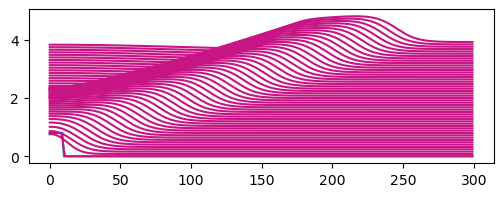

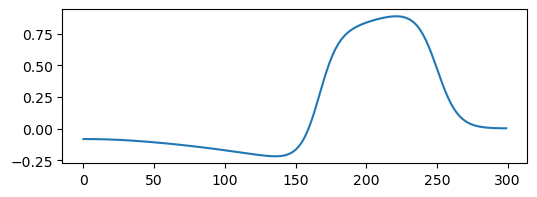

The time of execution of above program is : 13491.283893585205 ms


In [10]:
import time
start = time.time()

# FHN model in 1D. propagating waves
eps=.025;
a=0.1;
b=0.3;
delta=0.0
number=300;
ttime=100;
dt=0.01;
dx=0.2;
D=1.;
DD=D*dt/(dx*dx);
ntime=int(ttime/dt);
t= np.zeros(ntime);
x= np.arange(number)
u= np.zeros(number);
un= np.zeros(number);
v= np.zeros(number);
plt.figure(figsize=(6,2))

for i in range(0,10):
    u[i]=0.8;

plt.plot(x,u)
for it in range(1,ntime):
    t[it]=it*dt;
    u[0]=u[2];
    u[number-1]=u[number-3];
    for i in range(1,number-1):  
        lap = u[i+1]-2*u[i]+u[i-1];
        un[i]=u[i]+DD*lap+dt*(u[i]*(1-u[i])*(u[i]-a)-v[i]);
        v[i]=v[i]+dt*(eps*(b*u[i]-v[i]+delta));
        
    for i in range(1,number-1):  
        u[i]=un[i];
        
    #plt.plot(x,u+it,label='u voltage')
    
    if(it % 200 == 1):
        plt.plot(x,u+it*.0004,color='mediumvioletred')

plt.show()
plt.figure(figsize=(6,2))
plt.plot(x,u)
plt.show()
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

In [8]:
# Import time module
import time
 
# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The time of execution of above program is : 1.001119613647461 ms


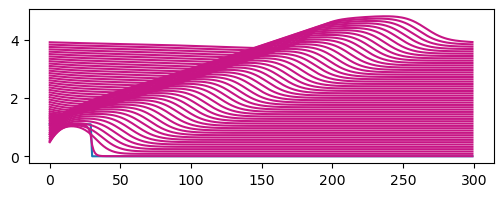

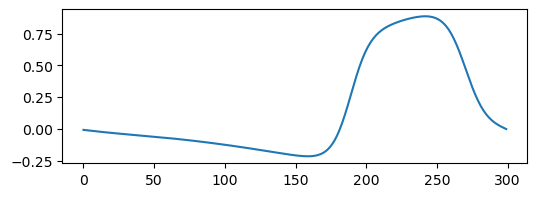

The time of execution of above program is : -1550688.0009174347 ms


In [31]:
 # FHN model in 1D. propagating waves implicit Euler method (Thomas Algorithm)
import time 
# record start time
start = time.time()
eps=.025;
a=0.1;
b=0.3;
delta=0.0
number=300;
timet=100;
dt=0.1;
dx=0.2;
D=1.;
DD=D*dt/(dx*dx);
aa=-DD;
cc=-DD;
bb=(1.-2.*aa);
ntime=int(timet/dt);
t= np.zeros(ntime);
x= np.arange(number)
u= np.zeros(number);
un= np.zeros(number);
v= np.zeros(number);
alpha=np.zeros(number);
beta=np.zeros(number);
FF=np.zeros(number);
plt.figure(figsize=(6,2))

for i in range(0,30):
    u[i]=1.1

plt.plot(x,u)

aC = np.zeros(number) ;
bC = np.zeros(number) ;
cC = np.zeros(number) ;
dC = np.zeros(number) ;

cp = np.zeros(number) ;
dp = np.zeros(number) ;

for i in range (0,number):
    aC[i]=-DD ;
    cC[i]=-DD ;
    bC[i]=1+2*DD ;
cC[0]=-2*DD ;
aC[-1]=-2*DD ;

cp[0]=cC[0]/bC[0];
for i in range (1,number-1):
    cp[i]=cC[i]/(bC[i]-aC[i]*cp[i-1]);
     
def FU(u,v):
    return u*(1-u)*(u-a)-v ;
def FV(u,v):
    return eps*(b*u-v+delta) ;

for it in range(1,ntime):  # time integration 
    #calculate the rest of the alphas and betas
        
    dC[1:-1]=FU(u[1:-1],v[1:-1])*dt+u[1:-1] ;
    dC[0]=0 ;
    dC[-1]=0 ;
    dp[0]=dC[0]/bC[0] ;
    for i in range(1,number-1):
        dp[i]=(dC[i]-aC[i]*dp[i-1])/(bC[i]-aC[i]*cp[i-1]);
         
    u[-1]=dp[-1]
    for i in range(number-2,-1,-1):
        u[i]=dp[i]-cp[i]*u[i+1];
    v=v+FV(u,v)*dt ;    
    #plt.plot(x,u+it,label='u voltage') 
    if(it % 20 == 1):
        plt.plot(x,u+it*.004,color='mediumvioletred')

plt.show()
plt.figure(figsize=(6,2))
plt.plot(x,u)
plt.show()
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

How long it takes to run twice the number of elements for twice the time?<br>
Add now a second stimulus on the oposit side and plot the collision.<br>
What higher values of dt can you use?

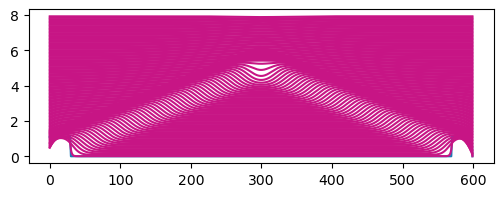

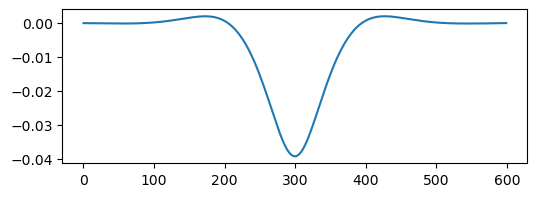

The time of execution of above program is : -315165.9846305847 ms


In [27]:
 # FHN model in 1D. propagating waves implicit Euler method (Thomas Algorithm)
import time 
# record start time
start = time.time()
eps=.025;
a=0.1;
b=0.3;
delta=0.0
number=600;
timet=200;
dt=0.1;
dx=0.2;
D=1.;
DD=D*dt/(dx*dx);
aa=-DD;
cc=-DD;
bb=(1.-2.*aa);
ntime=int(timet/dt);
t= np.zeros(ntime);
x= np.arange(number)
u= np.zeros(number);
un= np.zeros(number);
v= np.zeros(number);
alpha=np.zeros(number);
beta=np.zeros(number);
FF=np.zeros(number);
plt.figure(figsize=(6,2))

for i in range(0,30):
    u[i]=1.1
for i in range(number-30,number-1):
    u[i]=1.1
    
plt.plot(x,u)

aC = np.zeros(number) ;
bC = np.zeros(number) ;
cC = np.zeros(number) ;
dC = np.zeros(number) ;

cp = np.zeros(number) ;
dp = np.zeros(number) ;

for i in range (0,number):
    aC[i]=-DD ;
    cC[i]=-DD ;
    bC[i]=1+2*DD ;
cC[0]=-2*DD ;
aC[-1]=-2*DD ;

cp[0]=cC[0]/bC[0];
for i in range (1,number-1):
    cp[i]=cC[i]/(bC[i]-aC[i]*cp[i-1]);
     
def FU(u,v):
    return u*(1-u)*(u-a)-v ;
def FV(u,v):
    return eps*(b*u-v+delta) ;

for it in range(1,ntime):  # time integration 
    #calculate the rest of the alphas and betas
        
    dC[1:-1]=FU(u[1:-1],v[1:-1])*dt+u[1:-1] ;
    dC[0]=0 ;
    dC[-1]=0 ;
    dp[0]=dC[0]/bC[0] ;
    for i in range(1,number-1):
        dp[i]=(dC[i]-aC[i]*dp[i-1])/(bC[i]-aC[i]*cp[i-1]);
         
    u[-1]=dp[-1]
    for i in range(number-2,-1,-1):
        u[i]=dp[i]-cp[i]*u[i+1];
    v=v+FV(u,v)*dt ;    
    #plt.plot(x,u+it,label='u voltage') 
    if(it % 20 == 1):
        plt.plot(x,u+it*.004,color='mediumvioletred')

plt.show()
plt.figure(figsize=(6,2))
plt.plot(x,u)
plt.show()
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

How to treat the reaction term when solving implicit the diffusion term?<br>
####  The Adams-Bashforth method  ( predictor–corrector method )
(https://en.wikiversity.org/wiki/Adams-Bashforth_and_Adams-Moulton_methods)<br>
(https://en.wikipedia.org/wiki/Linear_multistep_method)
$$ y_{n+1} = y_n + \frac{3}{2} h f(t_n,y_n)-\frac{1}{2}hf(t_{n-1},y_{n-1})$$

How is the Thomas Algorithm for periodic boundary conditions?
<img src="thomas_periodic.png"  width="600">

Heat Equation in 2D:
$$
    \frac{\partial T}{\partial t} = D(\frac{\partial T^2}{\partial x^2}+\frac{\partial T^2}{\partial y^2})
$$
<img src="2d.png"  width="500">
Max dt given by:
<img src="dtmax.png"  width="200">

In [ ]:
How to implement this?:
    for i in range(1, nx-1):
    for j in range(1, ny-1):
        uxx = (u0[i+1,j] - 2*u0[i,j] + u0[i-1,j]) / dx2
        uyy = (u0[i,j+1] - 2*u0[i,j] + u0[i,j-1]) / dy2
        u[i,j] = u0[i,j] + dt * D * (uxx + uyy)


2D code of heat diffusion from the center of a domain:

0 1
100 2
150 3
200 4


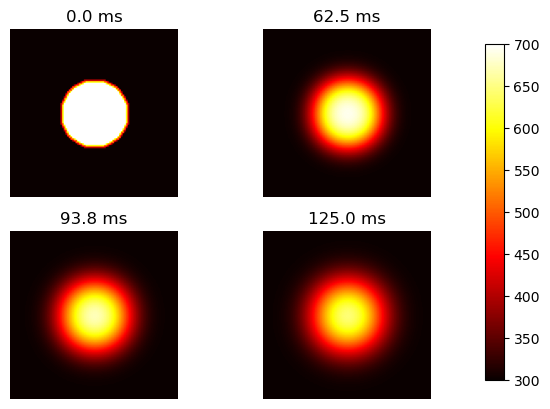

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 201
# Output 4 figures at these timesteps
mfig = [0, 100, 150, 200]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()


### What about reaction diffusion in 2D?
### The Gray-Scott model
https://groups.csail.mit.edu/mac/projects/amorphous/GrayScott/<br>
(http://www.mrob.com/pub/comp/xmorphia/index.html)

<IPython.core.display.Javascript object>


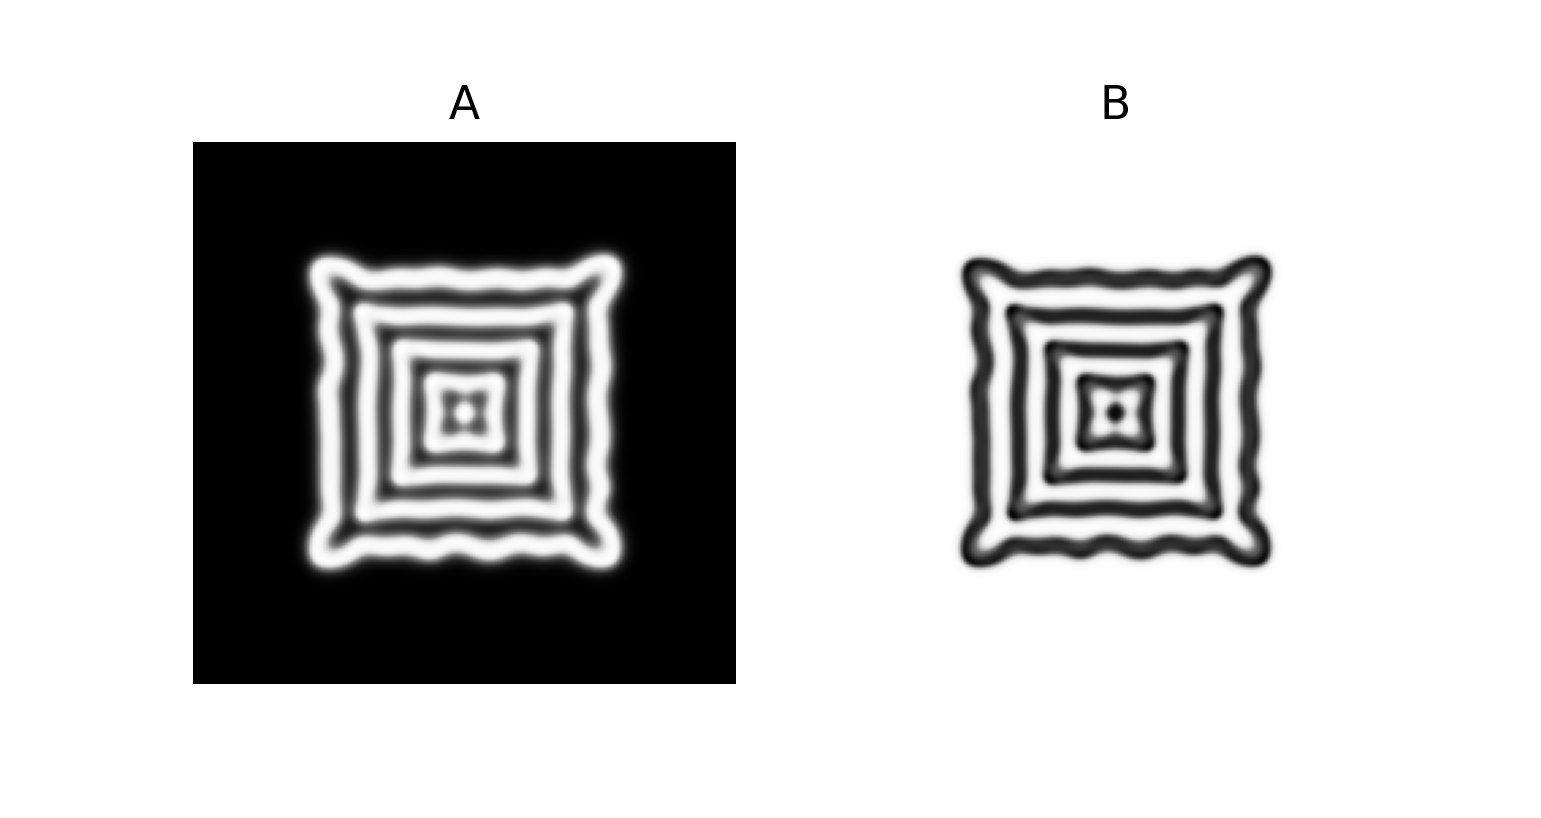

In [58]:
%matplotlib notebook
# import necessary libraries
import numpy as np
import matplotlib.pyplot as pl

# for the animation
import matplotlib.animation as animation
from matplotlib.colors import Normalize

# ============ define relevant functions =============

# an efficient function to compute a mean over neighboring cells
def apply_laplacian(mat):
    """This function applies a discretized Laplacian
    in periodic boundary conditions to a matrix
    For more information see 
    https://en.wikipedia.org/wiki/Discrete_Laplace_operator#Implementation_via_operator_discretization
    """

    # the cell appears 4 times in the formula to compute
    # the total difference
    neigh_mat = -4*mat.copy()

    # Each direct neighbor on the lattice is counted in
    # the discrete difference formula
    neighbors = [ 
                    ( 1.0,  (-1, 0) ),
                    ( 1.0,  ( 0,-1) ),
                    ( 1.0,  ( 0, 1) ),
                    ( 1.0,  ( 1, 0) ),
                ]

    # shift matrix according to demanded neighbors
    # and add to this cell with corresponding weight
    for weight, neigh in neighbors:
        neigh_mat += weight * np.roll(mat, neigh, (0,1))

    return neigh_mat

# Define the update formula for chemicals A and B
def update(A, B, DA, DB, f, k, delta_t):
    """Apply the Gray-Scott update formula"""

    # compute the diffusion part of the update
    diff_A = DA * apply_laplacian(A)
    diff_B = DB * apply_laplacian(B)
    
    # Apply chemical reaction
    reaction = A*B**2
    diff_A -= reaction
    diff_B += reaction

    # Apply birth/death
    diff_A += f * (1-A)
    diff_B -= (k+f) * B

    A += diff_A * delta_t
    B += diff_B * delta_t

    return A, B

def get_initial_A_and_B(N, random_influence = 0.2):
    """get the initial chemical concentrations"""

    # get initial homogeneous concentrations
    A = (1-random_influence) * np.ones((N,N))
    B = np.zeros((N,N))

    # put some noise on there
    A += random_influence * np.random.random((N,N))
    B += random_influence * np.random.random((N,N))

    # get center and radius for initial disturbance
    N2, r = N//2, 50

    # apply initial disturbance
    A[N2-r:N2+r, N2-r:N2+r] = 0.50
    B[N2-r:N2+r, N2-r:N2+r] = 0.25

    return A, B

def get_initial_artists(A, B):
    """return the matplotlib artists for animation"""
    fig, ax = pl.subplots(1,2,figsize=(5.65,3))
    imA = ax[0].imshow(A, animated=True,vmin=0,cmap='Greys')
    imB = ax[1].imshow(B, animated=True,vmax=1,cmap='Greys')
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title('A')
    ax[1].set_title('B')

    return fig, imA, imB

def updatefig(frame_id,updates_per_frame,*args):
    """Takes care of the matplotlib-artist update in the animation"""

    # update x times before updating the frame
    for u in range(updates_per_frame):
        A, B = update(*args)

    # update the frame
    imA.set_array(A)
    imB.set_array(B)

    # renormalize the colors
    imA.set_norm(Normalize(vmin=np.amin(A),vmax=np.amax(A)))
    imB.set_norm(Normalize(vmin=np.amin(B),vmax=np.amax(B)))

    # return the updated matplotlib objects
    return imA, imB

# =========== define model parameters ==========

# update in time
delta_t = 1.

# Diffusion coefficients
DA = 0.16  #.2
DB = 0.08  #.04

# define birth/death rates
f = .06 #.06 #.025 #.012 #.035 #0.060
k = .062 #.052 #.05 #.05 #.065 #0.062

# grid size
N = 200

# intialize the figures
A, B = get_initial_A_and_B(N)
fig, imA, imB = get_initial_artists(A, B)

# how many updates should be computed before a new frame is drawn
updates_per_frame = 10

# these are the arguments which have to passed to the update function
animation_arguments = (updates_per_frame, A, B, DA, DB, f, k, delta_t)

# start the animation
ani = animation.FuncAnimation(fig, #matplotlib figure
                              updatefig, # function that takes care of the update
                              fargs=animation_arguments, # arguments to pass to this function
                              interval=1, # update every `interval` milliseconds
                              blit=True, # optimize the drawing update 
                              )

# show the animation
pl.show()

https://chaos.gatech.edu/NGL_CSF/ <br>
https://chaos.gatech.edu/NGL2.0/

## ElectroMagnetism


Objectives: solving Particles moving in an electric field (Electric Football), and  traveling E&M waves. 

Using the  Finite-Difference  Time-Domain  method  (FDTD) which is  today’s  one  of  the  most  popular  technique  for  the  solution  of  electromagnetic  problems. The technique was first proposed by K. Yee,

In [59]:
import numpy as np
from math import *  
from ipywidgets import interactive
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

How to plot Electic field lines prouced by charge particles:
$$ \vec E =  \sum Q \vec r /r^3 $$
Note: remember, same way as how we did flow diagrams in phase space for the FHN model. Using streamplot


In [62]:
#Import pylab inline
%pylab inline
seterr(all='ignore') # ignore all floating point errors

N = 51 # Number of points in x-coordinate and y-coordinate each
a, b = linspace(-5, 5, N), linspace(-5, 5, N) # Set evenly spaced points within the interval -5 and 5
xa, ya = meshgrid(a, b)     # A meshgrid in the xy plane. xa contains the x-coordinates
Ex = zeros_like(xa)         # 2D array to store the Ex and
Ey = zeros_like(ya)         # Ey components

Q = [(5, 0, 0)]  # Charges (Value, x-cord, y-cord)
# Q then has two components index and value in the index.
#first [ ] indicated element in Q, second [] indicates value in that element
print(Q[0][0])  


Populating the interactive namespace from numpy and matplotlib
5


Populating the interactive namespace from numpy and matplotlib


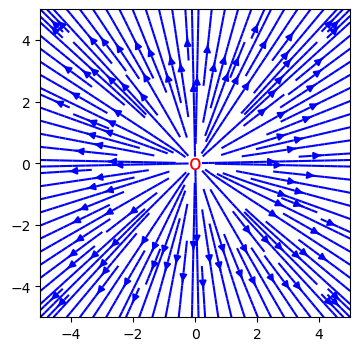

In [66]:
#Import pylab inline
%pylab inline
seterr(all='ignore') # ignore all floating point errors
plt.figure(figsize=(4,4))
N = 51 # Number of points in x-coordinate and y-coordinate each
a, b = linspace(-5, 5, N), linspace(-5, 5, N) # Set evenly spaced points within the interval -5 and 5
xa, ya = meshgrid(a, b)     # A meshgrid in the xy plane. xa contains the x-coordinates
Ex = zeros_like(xa)         # 2D array to store the Ex and
Ey = zeros_like(ya)         # Ey components

Q = [(5, 0, 0)]  # Charges (Value, x-cord, y-cord)
# Q then has two components index and value in the index.
#first [ ] indicated element in Q, second [] indicates value in that element
#print(Q[0][0])  

for q in Q:  # mark charge locations
    text(q[1], q[2], 'o', color = 'r', fontsize=15, va='center', ha='center')
 # calculate Ex and Ey at each point in the grid, due to all charges
for i in range(N):     
    for j in range(N):
        x, y = xa[i,j], ya[i,j]
        k=0
        #for k in range(len(Q)): # sum over the charges
             
        Ex[i,j] = Q[k][0]*(x-Q[k][1])/((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
        Ey[i,j] = Q[k][0]*(y-Q[k][2])/((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
            

streamplot(xa, ya, Ex, Ey, color='b', density= 1.6) #plot the field lines using streamplot
show() # show the plot

plot 3 field from 3 charges:

Populating the interactive namespace from numpy and matplotlib


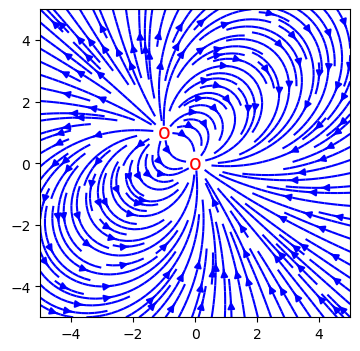

In [74]:
#Import pylab inline
%pylab inline
seterr(all='ignore') # ignore all floating point errors
plt.figure(figsize=(4,4))
N = 51 # Number of points in x-coordinate and y-coordinate each
a, b = linspace(-5, 5, N), linspace(-5, 5, N) # Set evenly spaced points within the interval -5 and 5
xa, ya = meshgrid(a, b)     # A meshgrid in the xy plane. xa contains the x-coordinates
Ex = zeros_like(xa)         # 2D array to store the Ex and
Ey = zeros_like(ya)         # Ey components
Q = [(5,-1,1), (-5, 0, 0) ]
#Q = [(5,-4,-4), (-5, 0, 0) ]
#Q = [(-5, 0, 3), (5, -2, -2), (5, 2, -2)]  # Charges (Value, x-cord, y-cord)

for q in Q:  # mark charge locations
    text(q[1], q[2], 'o', color = 'r', fontsize=15, va='center', ha='center')

for i in range(N):      # calculate Ex and Ey at each point in the grid, due to all charges
    for j in range(N):
        x, y = xa[i,j], ya[i,j]
        for k in range(len(Q)): # sum over the charges
             
            Ex[i,j] += Q[k][0]*(x-Q[k][1])/((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
            Ey[i,j] += Q[k][0]*(y-Q[k][2])/((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
            

streamplot(xa, ya, Ex, Ey, color='b', density= 1.6) #plot the field lines using streamplot
show() # show the plot

Solve the trajectory of a particle with charge qq in this Electric field.
$$ \vec F = q \vec E+ V x \vec B$$
using Euler<br>
Change the intial values of the particle's possition and velocity

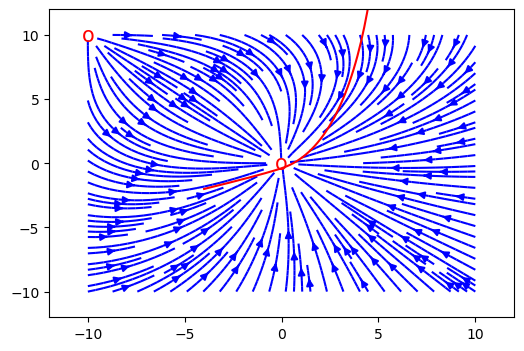

In [79]:
# Import pylab inline
#%pylab inline
#seterr(all='ignore') # ignore all floating point errors
ttime=4.5; #total time of integration
dt=0.01; # integration time step
ntime=int(ttime/dt); # number of iterations.
plt.figure(figsize=(6,4))
#position and velocity of the particle to track in time.
xp=np.zeros(ntime); 
yp=np.zeros(ntime);
Vx=np.zeros(ntime);
Vy=np.zeros(ntime);
#Initial position and velocity of the particle to track
xp[0]=-4;
yp[0]=-2;
Vx[0]=0;
Vy[0]=0;

N = 51 # Number of points in x-coordinate and y-coordinate each
a, b = linspace(-10, 10, N), linspace(-10, 10, N) # Set evenly spaced points within the interval -5 and 5
xa, ya = meshgrid(a, b)     # A meshgrid in the xy plane. xa contains the x-coordinates
Ex = zeros_like(xa)         # 2D array to store the Ex and
Ey = zeros_like(ya)         # Ey components
Exx=0;
Eyy=0;
Q = [(5,-10,10), (-5, 0, 0) ]
qq= 1;


for q in Q:  # mark charge locations
    text(q[1], q[2], 'o', color = 'r', fontsize=15, va='center', ha='center')

for i in range(N):      # calculate Ex and Ey at each point in the grid, due to all charges
    for j in range(N):
        x, y = xa[i,j], ya[i,j]
        for k in range(len(Q)): # sum over the charges
             
            Ex[i,j] += Q[k][0]*(x-Q[k][1])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
            Ey[i,j] += Q[k][0]*(y-Q[k][2])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
            
for i in range(0,ntime-1):
      #time[i]=i*dt;
      for k in range(len(Q)): # sum over the charges
            Exx += Q[k][0]*(xp[i]-Q[k][1])/ ((xp[i]-Q[k][1])**2+(yp[i]-Q[k][2])**2)**(1.5)
            Eyy += Q[k][0]*(yp[i]-Q[k][2])/ ((xp[i]-Q[k][1])**2+(yp[i]-Q[k][2])**2)**(1.5)
            
      Vx[i+1]= Vx[i]+dt*qq*Exx;
      Vy[i+1]= Vy[i]+dt*qq*Eyy;
      xp[i+1]=xp[i]+dt*Vx[i+1];
      yp[i+1]=yp[i]+dt*Vy[i+1];
        

streamplot(xa, ya, Ex, Ey, color='b', density= 1.6) #plot the field lines using streamplot
plt.ylim(-12., 12.)
plt.xlim(-12., 12.)
plt.plot(xp,yp,'r')
show() # show the plot

Electric football:

Populating the interactive namespace from numpy and matplotlib


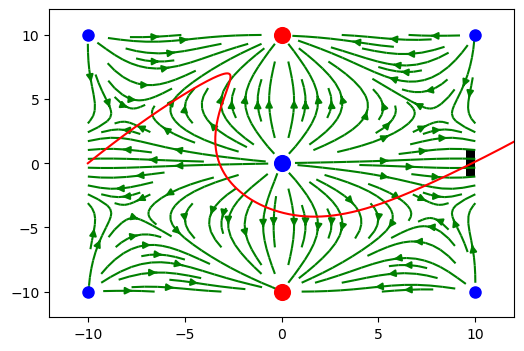

In [82]:
%pylab inline
seterr(all='ignore') # ignore all floating point errors
ttime=55.5; #total time of integration
dt=0.01; # integration time step
ntime=int(ttime/dt); # number of iterations.
plt.figure(figsize=(6,4))

#square=( 10, -1, 10, 1, 9.5, 1, 9.5,-1,10,-1); \
sqx = (10,10,9.5,9.5,10);
sqy=(-1,1,1,-1,-1);
xp= np.zeros(ntime); 
yp= np.zeros(ntime);
xp[0]=-10;
yp[0]=0;
Vx= np.zeros(ntime); 
Vy= np.zeros(ntime);
Vx[0]=.45;
Vy[0]=.55;
time= np.zeros(ntime);
time[0]=0;

N = 51 # Number of points in x-coordinate and y-coordinate each
a, b = linspace(-10, 10, N), linspace(-10, 10, N) # Set evenly spaced points within the interval -5 and 5
xa, ya = meshgrid(a, b)     # A meshgrid in the xy plane. xa contains the x-coordinates
Ex = zeros_like(xa)         # 2D array to store the Ex and
Ey = zeros_like(ya)         # Ey components
Exx=0;
Eyy=0;
Q = [(1, -10, 10), (1, -10, -10), (1,10,10), (1,10,-10), (-2,0,-10), (-2,0,10), (2,0,0)]
qq= -1;

for i in range(N):      # calculate Ex and Ey at each point in the grid, due to all charges
    for j in range(N):
        x, y = xa[i,j], ya[i,j]
        for k in range(len(Q)): # sum over the charges
             
            Ex[i,j] += Q[k][0]*(x-Q[k][1])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
            Ey[i,j] += Q[k][0]*(y-Q[k][2])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
         
# calculating the trajectory of the particle with charge qq.        
for i in range(0,ntime-1):
    time[i]=i*dt;
    Exx=0;
    Eyy=0;
    for k in range(len(Q)): # sum over the charges
        Exx += Q[k][0]*(xp[i]-Q[k][1])/ ((xp[i]-Q[k][1])**2+(yp[i]-Q[k][2])**2)**(1.5)
        Eyy += Q[k][0]*(yp[i]-Q[k][2])/ ((xp[i]-Q[k][1])**2+(yp[i]-Q[k][2])**2)**(1.5)
            
    Vx[i+1]= Vx[i]+dt*Exx*qq;  #calcualte velocity from acceleration due to electric field
    Vy[i+1]= Vy[i]+dt*Eyy*qq;
    xp[i+1]=xp[i]+dt*Vx[i+1];  # calculate position.
    yp[i+1]=yp[i]+dt*Vy[i+1];
        

streamplot(xa, ya, Ex, Ey, color='g', density= 1.0) #plot the field lines using streamplot
plt.ylim(-12., 12.)
plt.xlim(-12., 12.)
plt.plot(xp,yp,'r')
plt.fill(sqx,sqy,'k')
for q in Q:
    if q[0]>0:
        plot(q[1], q[2], 'bo', ms=8*sqrt(q[0]))
    if q[0]<0:
        plot(q[1], q[2], 'ro', ms=8*sqrt(-q[0]))
 
show() # show the plot

Lets make it interactive:

In [86]:
import numpy as np
from math import *  
from ipywidgets import interactive
from ipywidgets import FloatSlider
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.figure(figsize=(4,2))
seterr(all='ignore') # ignore all floating point errors
ttime=60; #total time of integration
dt=0.04; # integration time step
ntime=int(ttime/dt); # number of iterations.

#square=( 10, -1, 10, 1, 9.5, 1, 9.5,-1,10,-1); \
sqx = (10,10,9.5,9.5,10);
sqy=(-1,1,1,-1,-1);
xp= np.zeros(ntime); 
yp= np.zeros(ntime);
xp[0]=-10;
yp[0]=0;
Vx= np.zeros(ntime); 
Vy= np.zeros(ntime);
Vx[0]=.45;
Vy[0]=.55;
time= np.zeros(ntime);
time[0]=0;

N = 51 # Number of points in x-coordinate and y-coordinate each
a, b = linspace(-10, 10, N), linspace(-10, 10, N) # Set evenly spaced points within the interval -5 and 5
xa, ya = meshgrid(a, b)     # A meshgrid in the xy plane. xa contains the x-coordinates
Ex = zeros_like(xa)         # 2D array to store the Ex and
Ey = zeros_like(ya)         # Ey components
Exx=0;
Eyy=0;
Q = [(1, -10, 10), (1, -10, -10), (1,10,10), (1,10,-10), (-2,0,-10), (-2,0,10), (2,0,0)]
qq= -1;

for i in range(N):      # calculate Ex and Ey at each point in the grid, due to all charges
    for j in range(N):
        x, y = xa[i,j], ya[i,j]
        for k in range(len(Q)): # sum over the charges
             
            Ex[i,j] += Q[k][0]*(x-Q[k][1])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
            Ey[i,j] += Q[k][0]*(y-Q[k][2])/ ((x-Q[k][1])**2+(y-Q[k][2])**2)**(1.5)
         
# calculating the trajectory of the particle with charge qq.        
def f(vxo,vyo,yo):
    Vx[0]=vxo;
    Vy[0]=vyo;
    yp[0]=yo;
    for i in range(0,ntime-1):
        time[i]=i*dt;
        Exx=0;
        Eyy=0;
        for k in range(len(Q)): # sum over the charges
            Exx += Q[k][0]*(xp[i]-Q[k][1])/ ((xp[i]-Q[k][1])**2+(yp[i]-Q[k][2])**2)**(1.5)
            Eyy += Q[k][0]*(yp[i]-Q[k][2])/ ((xp[i]-Q[k][1])**2+(yp[i]-Q[k][2])**2)**(1.5)
            
        Vx[i+1]= Vx[i]+dt*Exx*qq;  #calcualte velocity from acceleration due to electric field
        Vy[i+1]= Vy[i]+dt*Eyy*qq;
        xp[i+1]=xp[i]+dt*Vx[i+1];  # calculate position.
        yp[i+1]=yp[i]+dt*Vy[i+1];
        
    streamplot(xa, ya, Ex, Ey, color='g', density= 1.0) #plot the field lines using streamplot
    plt.ylim(-12., 12.)
    plt.xlim(-12., 12.)
    plt.plot(xp,yp,'r')
    plt.fill(sqx,sqy,'k')
    for q in Q:
        if q[0]>0:
            plot(q[1], q[2], 'bo', ms=8*sqrt(q[0]))
        if q[0]<0:
            plot(q[1], q[2], 'ro', ms=8*sqrt(-q[0]))
    plt.show() # show the plot
    
#interactive_plot = interactive(f, vxo=(0, 1, .01), vyo=(0, 1, .01), yo=(-10,10,.5))
interactive_plot = interactive(f, vxo=FloatSlider(value=.45,min=0, max=1, step=.01, continuous_update=False), vyo=FloatSlider(value=.7,min=0, max=1, step=.01, continuous_update=False), yo=FloatSlider(value=-2.,min=-10, max=10, step=.25, continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot 

interactive(children=(FloatSlider(value=0.45, continuous_update=False, description='vxo', max=1.0, step=0.01),…

<Figure size 400x200 with 0 Axes>

Maxwell's Equations
<img src="Maxwell.png" width=400px>

A free propagating EM wave in the z direction reduces to four coupled  PDEs. two of which are zero.
<img src="Max1.png" width=200px>

For a polirized linear wave:
<img src="Max2.png" width=200px>

Discretization to first order (Taylor):
<img src="Max3.png" width=600px>

E and H will change in time as:
<img src="Max4.png" width=600px>

interation in time and space as:
<img src="Max3a.png" width=600px>

E and H do not have same scale, but we can re-scale E by using:
<img src="Max5.png" width=150px>

So we solve for:
<img src="Max6.png" width=600px>

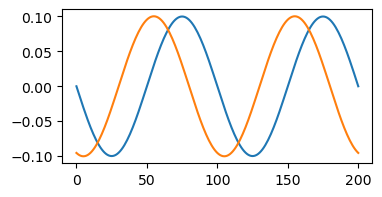

In [97]:
#E&M traveling waves code:
Xm = 201;  Ym = 100; Zm = 100; ts = 2;  beta = 0.01 
z = arange(Xm)
Ex= np.zeros(Xm); 
Hy= np.zeros(Xm);
Exn= np.zeros(Xm); 
Hyn=np.zeros(Xm); 
plt.figure(figsize=(4,2))

for i in range(0,Xm-1): #initial conditions of the E&M wave
    Ex[i]=0.1*sin(2*pi*(i-50)/100.);
    Hy[i]=0.1*sin(2*pi*(i-50)/100.);
plt.plot(z,Hy) 

for t in range(0,4000):
    for i in range(1,Xm-1):
        Exn[i] = Ex[i] + beta*(Hy[i-1]-Hy[i+1]) 
        Hyn[i] = Hy[i] + beta*(Ex[i-1]-Ex[i+1])
    Exn[0]     = Ex[0] + beta*(Hy[Xm-2]-Hy[1])   # BC
    Exn[Xm-1]  = Ex[Xm-1] + beta*(Hy[Xm-2]-Hy[1])   
    Hyn[0]     = Hy[0] + beta*(Ex[Xm-2]-Ex[1])  # BC
    Hyn[Xm-1]  = Hy[Xm-1]   + beta*(Ex[Xm-2]-Ex[1])  
        

    for i in range(0,Xm):                                           
        Ex[i] = Exn[i]                              # New -> old
        Hy[i] = Hyn[i]   

plt.plot(z,Hy)     
show() # show the plot  